In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\User\Documents\adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


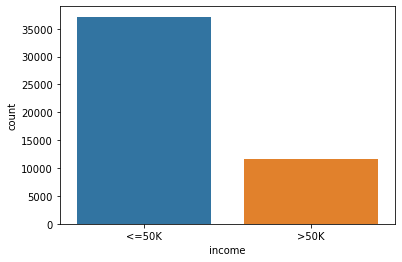

In [4]:
sns.countplot(df.income)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


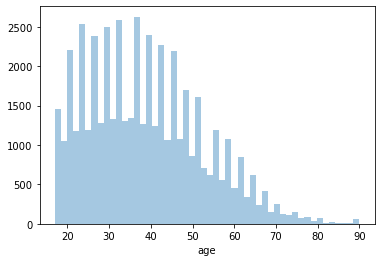

In [8]:
sns.distplot(df.age, kde=False)

In [10]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [13]:
df.workclass = df.workclass.replace('?', 'Federal-gov').replace('Without-pay', 'State-gov').replace('Never-worked', 'State-gov')

In [14]:
df.workclass.unique()

array(['Private', 'Local-gov', 'Federal-gov', 'Self-emp-not-inc',
       'State-gov', 'Self-emp-inc'], dtype=object)

In [15]:
df.fnlwgt.unique()

array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64)

In [17]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [18]:
df.education = df.education.replace('Some-college', 'Masters')

In [20]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)

In [21]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [25]:
df['marital-status'] = df['marital-status'].replace('Never-married', 
                                                    'Divorced').replace('Widowed', 'Divorced').replace('Separated','Divorced').replace('Married-spouse-absent', 'Divorced')

In [26]:
df['marital-status'] = df['marital-status'].replace('Married-civ-spouse', 'Married').replace('Married-AF-spouse', 'Married')

In [28]:
df['marital-status'].value_counts()

Divorced    26426
Married     22416
Name: marital-status, dtype: int64

In [29]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [30]:
df.occupation = df.occupation.replace('?', 'Armed-Forces')

In [31]:
df.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [32]:
df.relationship = df.relationship.replace('Other-relative', 'Not-in-family')

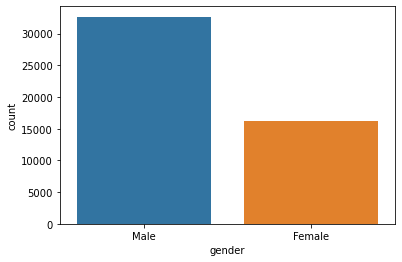

In [33]:
sns.countplot(df.gender)

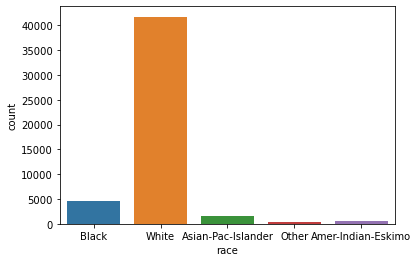

In [34]:
sns.countplot(df.race)

In [37]:
df['capital-gain'].unique()

array([    0,  7688,  3103,  6418,  7298,  3908, 14084,  5178, 15024,
       99999,  2597,  2907,  4650,  6497,  1055,  5013, 27828,  4934,
        4064,  3674,  2174, 10605,  3418,   114,  2580,  3411,  4508,
        4386,  8614, 13550,  6849,  2463,  3137,  2885,  2964,  1471,
       10566,  2354,  1424,  1455,  3325,  4416, 25236,   594,  2105,
        4787,  2829,   401,  4865,  1264,  1506, 10520,  3464,  2653,
       20051,  4101,  1797,  2407,  3471,  1086,  1848, 14344,  1151,
        2993,  2290, 15020,  9386,  2202,  3818,  2176,  5455, 11678,
        7978,  7262,  6514, 41310,  3456,  7430,  2414,  2062, 34095,
        1831,  6723,  5060, 15831,  2977,  2346,  3273,  2329,  9562,
        2635,  4931,  1731,  6097,   914,  7896,  5556,  1409,  3781,
        3942,  2538,  3887, 25124,  7443,  5721,  1173,  4687,  6612,
        6767,  2961,   991,  2036,  2936,  2050,  1111,  2228, 22040,
        3432,  6360,  2009,  1639, 18481,  2387], dtype=int64)

In [38]:
df['capital-loss'].unique()

array([   0, 1721, 1876, 2415, 1887,  625, 1977, 2057, 1429, 1590, 1485,
       2051, 2377, 1672, 1628, 1902, 1602, 1741, 2444, 1408, 2001, 2042,
       1740, 1825, 1848, 1719, 3004, 2179, 1573, 2205, 1258, 2339, 1726,
       2258, 1340, 1504, 2559, 1668, 1974, 1980, 1564, 2547, 2002, 1669,
       1617,  323, 3175, 2472, 2174, 1579, 2129, 1510, 1735, 2282, 1870,
       1411, 1911, 1651, 1092, 1762, 2457, 2231, 2238,  653, 1138, 2246,
       2603, 2392, 1944, 1380, 2465, 1421, 3770, 1594,  213, 2149, 2824,
       1844, 2467, 2163, 1816, 1648, 2206, 2352,  419, 1539,  880,  810,
        974, 4356, 2489, 1755, 3683, 2267, 2080,  155, 3900, 2201, 2754],
      dtype=int64)

In [41]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [42]:
df['native-country'] = df['native-country'].replace('?', 'Holand-Netherlands')

In [43]:
cat = [col for col in df.columns if df[col].dtype=='O']
cat

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [44]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['workclass']=lab.fit_transform(df['workclass'])
df['education']=lab.fit_transform(df['education'])
df['marital-status']=lab.fit_transform(df['marital-status'])
df['occupation']=lab.fit_transform(df['occupation'])
df['relationship']=lab.fit_transform(df['relationship'])
df['race']=lab.fit_transform(df['race'])
df['gender']=lab.fit_transform(df['gender'])
df['native-country']=lab.fit_transform(df['native-country'])
df['income']=lab.fit_transform(df['income'])

In [45]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,0,6,2,2,1,0,0,40,38,0
1,38,2,89814,11,9,1,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,1,10,0,4,1,0,0,40,38,1
3,44,2,160323,12,10,1,6,0,2,1,7688,0,40,38,1
4,18,0,103497,12,10,0,1,2,4,0,0,0,30,38,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int32
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int32
 6   occupation       48842 non-null  int32
 7   relationship     48842 non-null  int32
 8   race             48842 non-null  int32
 9   gender           48842 non-null  int32
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int32
 14  income           48842 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 3.9 MB


In [47]:
X = df.drop('income', axis=1)
y = df['income']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log = LogisticRegression()

In [52]:
log.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
pred = log.predict(X_test)

In [54]:
log.score(X_test, y_test)

0.8013102671716654

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [56]:
accuracy_score(y_test, pred)

0.8013102671716654

In [58]:
confusion_matrix(y_test, pred)

array([[7153,  326],
       [1615,  675]], dtype=int64)

In [59]:
log.score(X_train, y_train)

0.7948711386379341